# Maximum Likelihood vs CDF Fitting of Samples for Estimation of Distributions

In [71]:
from matplotlib import pyplot as plot
from scipy.optimize import curve_fit, fsolve
from sympy import lambdify, log

import DistA
from LocUtil import Grid1, SetSeed

In [22]:
import importlib
importlib.reload(DistA)

<module 'DistA' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\2dDist\\DistA.py'>

In [8]:
nSamp = 100

givenSeed = None
seedDig = 3

nPlot = 101

## Generate Data

In [80]:
seed = SetSeed(givenSeed,seedDig)
seed

494

In [81]:
a = 0.3

In [82]:
samp = tuple(sorted(DistA.GenSamp(a) for _ in range(nSamp)))

## CDF Fitting

In [83]:
quant = [(k + 0.5) / nSamp for k in range(nSamp)]

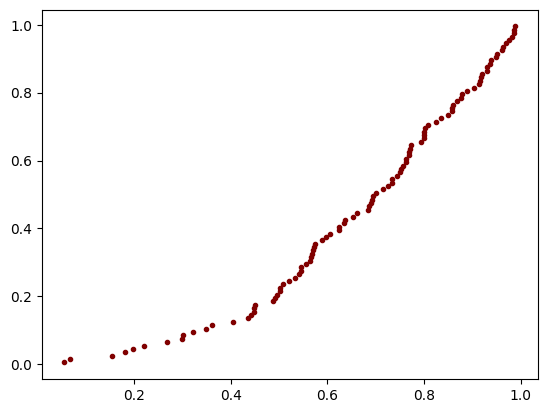

In [84]:
plot.plot(samp,quant, '.', c="maroon", label="samples")

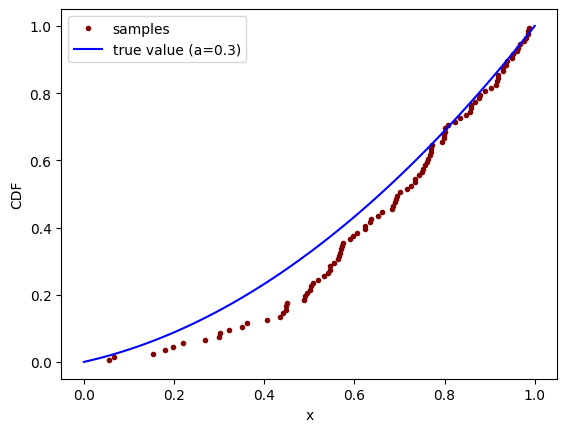

In [85]:
plot.plot(samp,quant, '.', c="maroon", label="samples")

xGrid = Grid1(0,1, nPlot)
cdfGrid = [DistA.CdfNum(x,a) for x in xGrid]
plot.plot(xGrid, cdfGrid, c="Blue", label=f'true value (a={a})')

plot.xlabel('x')
plot.ylabel('CDF')
plot.legend()

In [90]:
optParam,_ = curve_fit(DistA.CdfNum, samp,quant)
aEst = optParam[0]
aEst

-0.00468794555237495

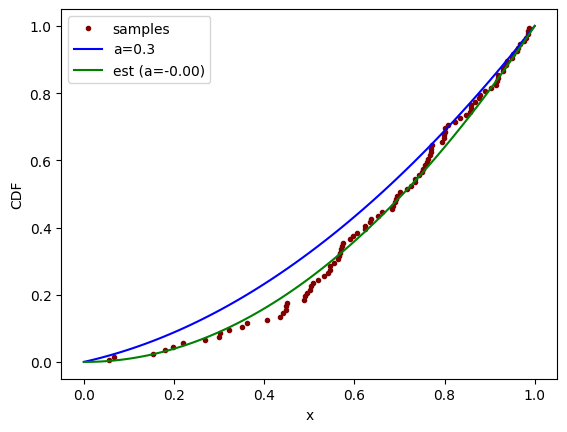

In [87]:
plot.plot(samp,quant, '.', c="maroon", label="samples")

cdfGrid = [DistA.CdfNum(x,a) for x in xGrid]
plot.plot(xGrid, cdfGrid, c="Blue", label=f'a={a}')

cdfGrid = [DistA.CdfNum(x,aEst) for x in xGrid]
plot.plot(xGrid, cdfGrid, c="Green", label=f'est (a={aEst:.2f})')

plot.xlabel('x')
plot.ylabel('CDF')
plot.legend()

## Maximum Likelihood

In [91]:
derivLogLikeTerm = log(DistA.pdfSym).diff(DistA.aSym).simplify()
derivLogLikeTerm

(1 - 2*x)/(a - 2*x*(a - 1))

In [92]:
temp = sum(derivLogLikeTerm.subs(DistA.xSym, x) for x in samp)

In [93]:
f = lambdify(DistA.aSym, temp)

In [94]:
fsolve(f,1)

array([0.00765061])

In [95]:
aGrid = Grid1(0,2,nPlot)
deriv = [f(a) for a in aGrid]